## Problem 1 ##

Note to grader: I referenced class lecture, the EM_unsupervised_image_clustering.py starter code provided, and https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f to complete this problem.

In [ ]:
# Unsupervised Image Classification
# using Gaussian Mixture Model Expectation Maximization
# by William F. Basener
# University of Virginia, School of Data Science

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# read the image and convert to numpy array
im = Image.open('Haiti_Image.tif')
imArray = np.array(im)
nrows, ncols, nbands = np.shape(imArray)

# reshape the image array to num_observations by num_features (1,000,000 by 3) # RGB is reason for 3
X = np.reshape(imArray,[nrows*ncols,nbands])

# Create and train our Gaussian Mixture Expectation Maximization Model
model = GaussianMixture(n_components=4, tol=0.1)
model.fit(X)
# predict latent values
yhat = model.predict(X)

# reshape the result into an image
imSubset_hat = np.reshape(yhat,[nrows,ncols])

# plot the output, including the BIC in the title
plt.figure()
plt.suptitle('Unsupervised EM Classification, BIC = '+"{:e}".format(model.bic(X)))
plt.subplot(121)
plt.imshow(imArray)
plt.title('Color Image')
plt.subplot(122)
plt.imshow(imSubset_hat)
plt.title('GMM EM Classification Result')
plt.show()



In [17]:
## Gather probability predctions of class assignment

predictions= model.predict_proba(X)

## Gather clusters

Cluster=list()
for i in range(4):
    Cluster.append(np.reshape(predictions[:,i],[nrows,ncols]))

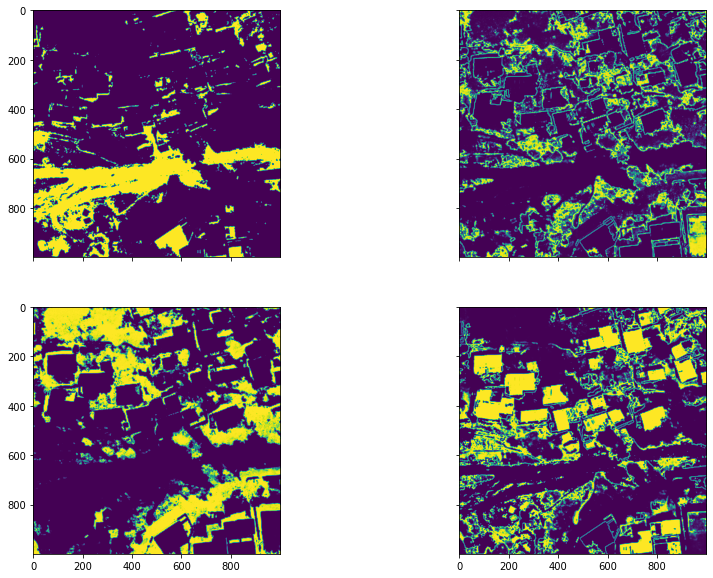

In [117]:
## Plot four classes: note - pulled from class content

fig, axs = plt.subplots(2,2,figsize=(14,10), sharex=True, sharey= True)
axs[0,0].imshow(Cluster[0])
axs[0,1].imshow(Cluster[1])
axs[1,0].imshow(Cluster[2])
axs[1,1].imshow(Cluster[3])

In [24]:
## KM implementation

from sklearn.cluster import KMeans
model2=KMeans(n_clusters=4).fit(X)

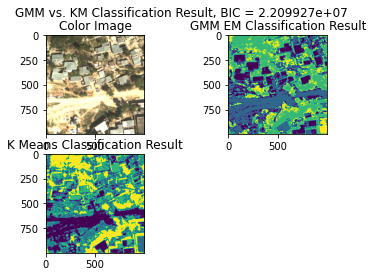

In [74]:
# predict latent values
yhat = model2.predict(X)
yhat

# reshape the result into an image
imSubset_hat2 = np.reshape(yhat,[nrows,ncols])
imSubset_hat

# plot the output, including the BIC in the title
plt.figure()
plt.suptitle('GMM vs. KM Classification Result, BIC = '+"{:e}".format(model.bic(X)))
plt.subplot(221)
plt.imshow(imArray)
plt.title('Color Image')
plt.subplot(222)
plt.imshow(imSubset_hat)
plt.title('GMM EM Classification Result')
plt.subplot(223)
plt.imshow(imSubset_hat2)
plt.title('K Means Classification Result')
plt.show()

Part 1 Answer: As seen above, the KM Means and GMM classification approaches result in different analyses of the Haiti image provided. At face value, the GMM classification result appears to have a much more granular classification than the K Means approach, which is precisely what I would expect to see. The GMM classification provides a "soft classification" by providing each pixel a probability of assignment to each class, thus providing providing granular class/color variation between pixels in similar locations on the image. K Means segmenting provides hard classification for individual pixels within the four cluster categories, resulting in an image the is more heavily grouped in certain areas (e.g. yellow stays with yellow in large clumps, blue stays with blue in large clumps, etc.). 

Part 2 Answer: I interpreted this question to ask about the posterior responsibility of a class assignment for a given data point.

![](HW4P1.jpg)

Part 3 Answer: Cluster 1 (top left) seems to do a good job of identifiying roads. Cluster 2 (top right) seems to be able to outline infrastructure well, with discrete boundaries. Cluster 3 (bottom left) does a good job of identifying foliage. And Cluster 4 (bottom right) similarly identifies infrastructure, with a better resolution for rooftops. These different cluster would prove useful for a variety of scenarios. For instance, Haiti often bears the brunt of hurricanes passing through the Atlantic - by identifying rooftops, humanitarian organizations could target metropolitan aid efforts. Similarly, road and foiliage identification might be useful for drainage assessments, providing preemptive information on flood preventative measures.

In [75]:
## Gather clusters

Cluster=list()
for i in range(4):
    Cluster.append(np.reshape(predictions[:,i],[nrows,ncols]))

AttributeError: 'KMeans' object has no attribute 'predict_proba'

In [112]:
# Create four cluster arrays, where only cluster assignment of interest is retained, all else zeroes
empty=np.zeros()
imSubset_hat2.shape

(1000, 1000)

In [ ]:
## Plot four classes: note - pulled from class content

fig, axs = plt.subplots(2,2,figsize=(14,10), sharex=True, sharey= True)
axs[0,0].imshow(Cluster[0])
axs[0,1].imshow(Cluster[1])
axs[1,0].imshow(Cluster[2])
axs[1,1].imshow(Cluster[3])

## Problem 2 ##

The Evidence Lower Bound is often expressed in the following form: ![](ELBO.png)

This larger equation is a component of the KL divergence, which measures the "closeness" of our approximation distribution (q(D)) with the target distribution (p(D)). This equation can be decomposed into the following two terms: ![](decomp.png)

Rewritten, the first term above reflects the likelihood we are interested in maximizing - log(p(D|Z)p(Z). The second term represents the variance or entropy of our approximation distribution. Therefore, the ELBO does indeed contain components that account for bias and variance, and the ratio in which it is expressed represents that tradeoff that we must navigate as data scientists.